## Regressão Linear

#### Integrantes:
Hugo Cunha - 1610565

Pedro Felipe - 1611074

Renan Moreira - 1611061

Yan Cunha - 1610886


In [64]:
# IMPORTS #
% matplotlib inline 
import requests
import pandas as pd
import numpy as np

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning libraries and functions
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# validação
from sklearn.model_selection import cross_val_score, cross_val_predict
import sklearn.metrics

np.random.seed(10011001)

In [57]:
url="https://raw.githubusercontent.com/Pedro-Magalhaes/Teste/master/T2/dataset1.csv"
df=pd.read_csv(url)
all_predictors = [ f'V{x}' for x in range(1,14) ] # [V1,V2...V13]
target = 'target'

# TODO: Retirar comentarios
# plotar a correlação e calcular o coeficiente das features com o target ? Fiz primeira parte fazer o resto, como?
# ver correlação positiva e negativa entre as features. ok
# extrair função de cada método de regressão e fazer várias rodadas para plotar resultados
# ENDTODO


## Verificando correlações

Vamos plotar a matriz de correlção do dataset para avaliar algumas correlaçoes

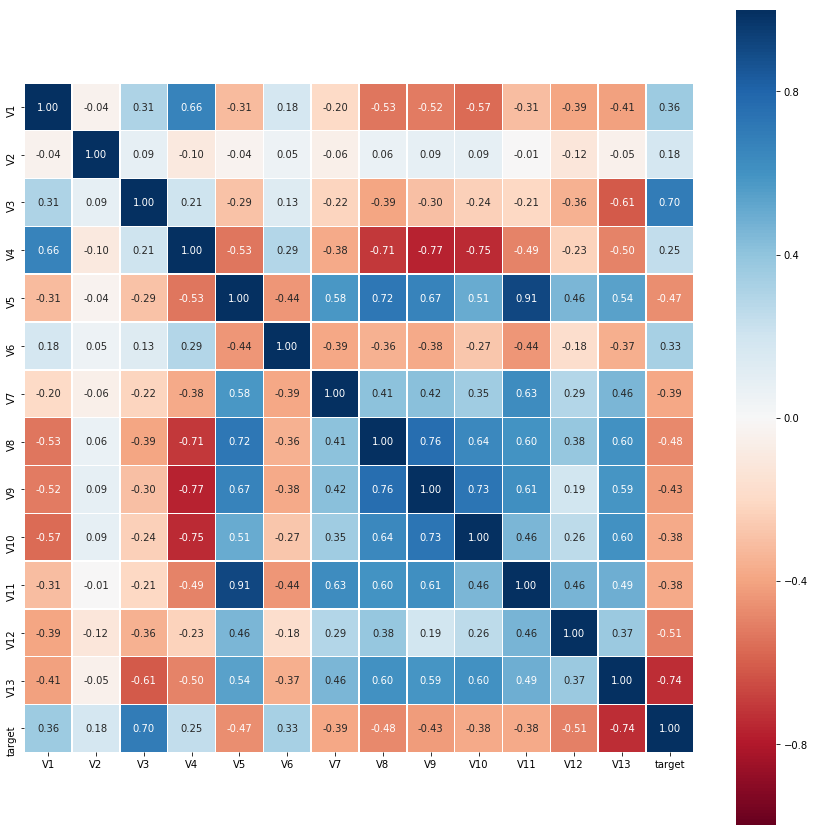

In [3]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),linewidths=.5,square = True,cmap = "RdBu",vmin=-1.0,vmax=1.0,annot = True,fmt =".2f",ax=ax)

### Análise do heatmap
##### Podemos ver que alguns atributos tem correlação, por exemplo V11 tem forte correlação positiva com V5. V8,V9,V10 tem correlação negativa com V4

Apartir desta analise vamos fazer um algoritmo para verificar e printar as correlações com o algoritmo de Pearsen e Spearman, remover colunas com correlação acima de um "threshold" e testar a regressão linear com o novo dataset.
Vamos rodar varias rodadas com cada dataset e fazer o boxplot para analise. Comparando com o dataset completo

In [4]:
# Verificando e printando correlações fortes
from scipy.stats.stats import spearmanr  
labels = all_predictors + [target]
threshold = 0.7 #threshold para considerar uma correlação relevante
cor = df.corr() # matriz com a correlaçao de pearson
att_corr_set = set()
for col in cor:
    print(f"Corr de {col}:", end=" ")
    for i,val in enumerate(cor[col]):
        spearman_rho = spearmanr(df[col].values, df[labels[i]].values)[0] # calcula correlação de Spearman
        if abs(val ) >= threshold and val != 1.0: # para pegar as corr negativas e positivas excluindo o proprio atributo
            print(f"({labels[i]}: pear:{val:.2f},spear:{spearman_rho:.3f})", end=" ")
            att_corr_set.add(labels[i])
    print()


Corr de V1: 
Corr de V2: 
Corr de V3: 
Corr de V4: (V8: pear:-0.71,spear:-0.757) (V9: pear:-0.77,spear:-0.880) (V10: pear:-0.75,spear:-0.802) 
Corr de V5: (V8: pear:0.72,spear:0.664) (V11: pear:0.91,spear:0.705) 
Corr de V6: 
Corr de V7: 
Corr de V8: (V4: pear:-0.71,spear:-0.757) (V5: pear:0.72,spear:0.664) (V9: pear:0.76,spear:0.791) 
Corr de V9: (V4: pear:-0.77,spear:-0.880) (V8: pear:0.76,spear:0.791) (V10: pear:0.73,spear:0.795) 
Corr de V10: (V4: pear:-0.75,spear:-0.802) (V9: pear:0.73,spear:0.795) 
Corr de V11: (V5: pear:0.91,spear:0.705) 
Corr de V12: 
Corr de V13: (target: pear:-0.74,spear:-0.853) 
Corr de target: (V13: pear:-0.74,spear:-0.853) 


#### Plotando o Pair_plot de todos os atributos que possuem alguma correlação maior que o threshold definido acima

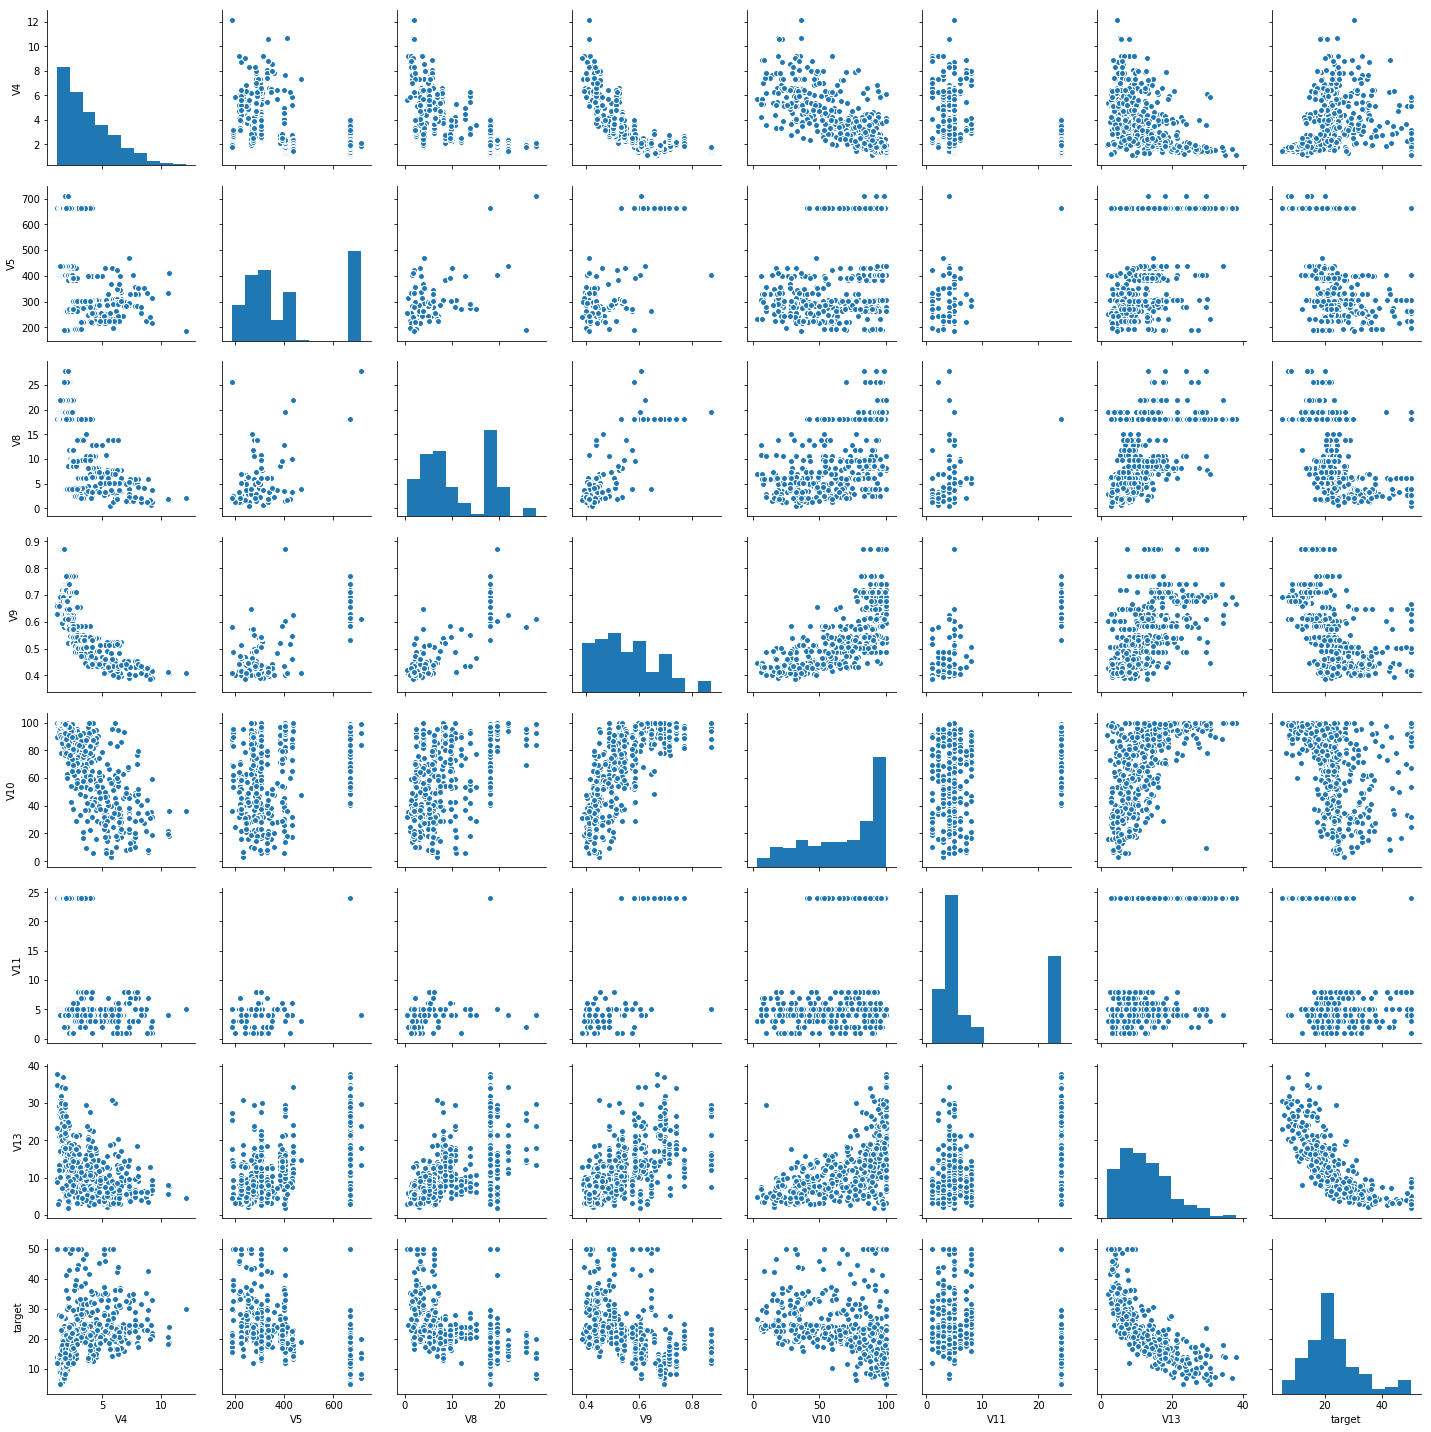

In [5]:
def stufV(elem): # função para ordenar de maneira correta, pois V11 < V9, mas V11 > V09
    if len(elem) == 2:
        return 'V0'+elem[1]
    return elem
# plotando apenas as variaveis que tem correlação forte com outra (acima de (+-)0.7 de pearson)
sns.pairplot(data=df, vars=sorted(att_corr_set,key=stufV))

In [7]:
def linearReg(df, pred, target):
    ''' Função de regressão linear simples que retorna apenas o r^2 ajustado '''
    dfTrain, dfTest = train_test_split(df, test_size=0.1)

    predictors =  pred

    X_train = np.array(dfTrain[predictors])
    y_train = np.array(dfTrain[target])

    X_test = np.array(dfTest[predictors])
    y_test = np.array(dfTest[target])

    # Create linear regression object
    regr = sk.linear_model.LinearRegression(normalize=True)

    # Train the model using the training sets
    regr.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test)


    SS_Residual = sum((y_test - y_pred)**2)
    SS_Total = sum((y_test - np.mean(y_test))**2)
    r_squared = 1 - (float(SS_Residual)) / SS_Total
    adjusted_r_squared = 1 - (1 - r_squared) * (len(y_test)-1) / (len(y_test)-X_test.shape[1]-1)
    
    return adjusted_r_squared

#### Rodando regressão linear simples para o data_set sem atributos com alta correlação
Para cada threshold (0.7,0.75,0.9, 1.0) de correlação de Pearsen vamos rodar uma bateria de rodadas do algoritmo de  regressão linear simples para comparar os resultados.

threshold:0.7,colunas a deletar:['V8', 'V9', 'V10', 'V11'] 
threshold:0.75,colunas a deletar:['V9', 'V11'] 
threshold:0.9,colunas a deletar:['V11'] 
threshold:1.0,colunas a deletar:[] 
              0.7        0.75         0.9         1.0
count  200.000000  200.000000  200.000000  200.000000
mean     0.620243    0.595577    0.607783    0.600492
std      0.141338    0.138171    0.128493    0.138371
min      0.040740    0.040693   -0.061855   -0.307560
25%      0.539362    0.520108    0.526690    0.557089
50%      0.646339    0.623238    0.630258    0.620951
75%      0.720720    0.690602    0.699266    0.695806
max      0.851309    0.825914    0.840316    0.798006


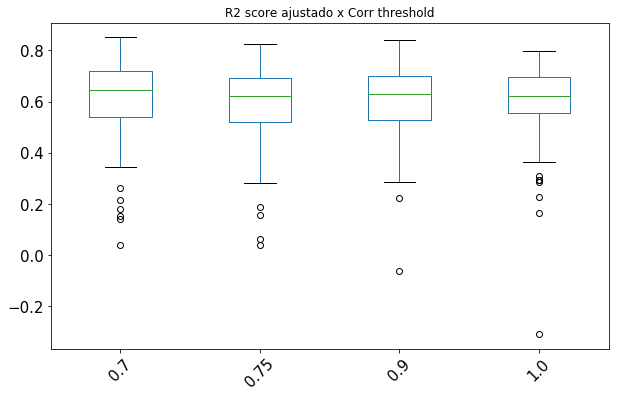

In [11]:
np.random.seed(10011001)
# Vamos criar os thresholds que vamos usar para variar as colunas sendo deletadas do DF
thresholds = [0.7,0.75,0.9, 1.0]
samples = 200
# Create correlation matrix, without the target (o target não pode ser retirado para a regressão)
cor = df[all_predictors].corr().abs()
results = {}
# Select upper triangle of correlation matrix
upper = cor.where(np.triu(np.ones(cor.shape), k=1).astype(np.bool))

for i,threshold in enumerate(thresholds):
    # Find index of feature columns with correlation greater than the threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    print(f"threshold:{threshold},colunas a deletar:{to_drop} ")
    df_no_corr = df.drop(df[to_drop], axis=1)
    pred =  all_predictors[:]
    
    for ele in to_drop: # removendo os elementos de predição
        pred.remove(ele)
        
    results[str(threshold)] = np.zeros(samples) # dict para guardar todos os r^2 de um determinado threshold
    
    for j in range(samples):
        results[str(threshold)][j] = linearReg(df_no_corr,pred,target)

result_df = pd.DataFrame(data=results)
print(result_df.describe())
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('R2 score ajustado x Corr threshold')
result_df.boxplot(ax=ax,grid=False, rot=45, fontsize=15)

pass

#### Resultado
Os resultados ficaram muito próximos, mas em geral (removendo a seed fixa) o dataframe completo obtem os melhores resultados. No entanto, acredito que afirmar que um modelo é melhor que o outro fica complicado pela proximidade dos resultados e principalmente pela falta de consistência nos resultados

# Verificando coeficientes de utilização nos ridge e lasso para ver se podemos fazer alguma mudança no dataset

In [12]:
def lasso_regression(df,alpha,pred,target,test_sz = 0.1):
    ''' Faz a regressão de lasso e retorna o score r2 e os coeficientes '''
    dfTrain, dfTest = train_test_split(df, test_size=test_sz)

    predictors = pred

    X_train = np.array(dfTrain[predictors])
    y_train = np.array(dfTrain[target])

    X_test = np.array(dfTest[predictors])
    y_test = np.array(dfTest[target])

    # Create linear regression object
    regr = sk.linear_model.Lasso(alpha=alpha,normalize=True)

    # Train the model using the training sets
    regr.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test)
    
    return r2_score(y_test, y_pred),regr.coef_ 

### Usando lasso para avaliar as features
Fomos reduzindo o alpha para avaliar qual feature era usada pelo algoritmo, em seguida vamos rodar varias vezes o algoritmo com o "melhor" alpha e pegar o mean dos coeficientes dos preditores para ver se alguma feature pode ser removida.

In [43]:
np.random.seed(10011001)
alpha_list = [ 1 - x*0.002 for x in range( int(1/0.002) ) ]
alpha_list += [0.001]
sample = 200
best_variance = -100
best_a = 200 # alpha que rendeu o melhor resultado
# variando o alpha
for a in alpha_list: 
    r2,coef = lasso_regression(df,a,all_predictors,target,0.1)
    if( r2 > best_variance ):
        best_variance = r2
        best_a = a

coef_df = pd.DataFrame(columns = all_predictors)
# vamos pegar o mean de cada coeficiente para avaliar
for i in range(sample):
    r2,coef = lasso_regression(df,best_a,all_predictors,target,0.1)
    coef_df.loc[len(coef_df)] = coef
print("best: a = {}, variancia = {}".format(best_a,best_variance) )
print(coef_df.mean())


best: a = 0.010000000000000009, variancia = 0.7997928488632947
V1     0.013843
V2     2.429804
V3     4.222115
V4    -0.776035
V5    -0.000057
V6     0.007409
V7    -0.037412
V8    -0.006413
V9    -8.731625
V10   -0.000011
V11    0.003597
V12   -0.816926
V13   -0.522660
dtype: float64


#### Analisando o resultado, consitentemente vimos que o atributo "V9"  tem o coeficiente muito baixo e por isso vamos tentar rodar sem ele

### Linear regression sem o atributo V9

             full       no_v9
count  200.000000  200.000000
mean     0.602081    0.607327
std      0.133700    0.136478
min     -0.156150   -0.004098
25%      0.541832    0.533677
50%      0.629296    0.634082
75%      0.694373    0.700441
max      0.798664    0.839352


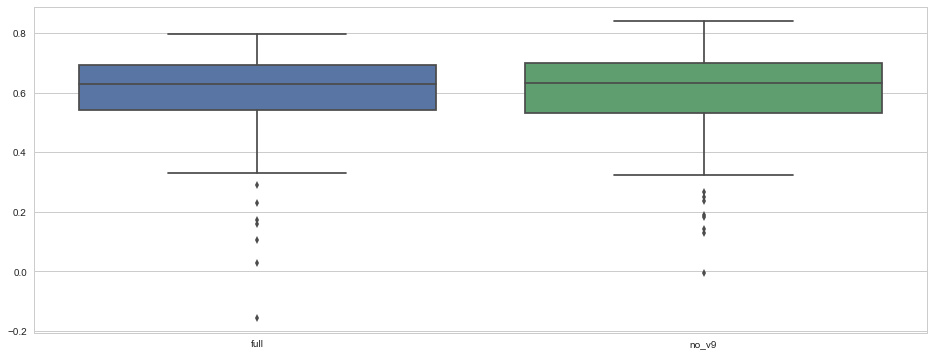

In [75]:
samples = 200
results = [np.zeros(samples) , np.zeros(samples)] # 0 vai ser a linear com todos os atributos e 1 sem o "v9"
pred = all_predictors[:]
pred_no_v9 = all_predictors[:]
pred_no_v9.remove('V9') # removendo o V9
df_no_v9 = df.drop(columns='V9')

for i in range(samples):
    results[0][i] = linearReg(df,pred,target)
    results[1][i] = linearReg(df_no_v9,pred_no_v9,target)

result_df = pd.DataFrame({'full':results[0],'no_v9':results[1]})
print(result_df.describe()) # verificando os valores numericos

sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))
sns.boxplot(data=result_df) # visualização

#### Analise:
Aparentemente ocorreu um ganho na regressão ao retirarmos um atributo 'V9' no entanto o resultado não é conclusivo pois o ganho de R2 ajustado foi bem pequeno

### Ridge regression
Repetindo com o Ridge

In [82]:
def ridgeRegression(df,alpha,pred):
    dfTrain, dfTest = train_test_split(df, test_size=0.1)
    
    predictors =  pred

    X_train = np.array(dfTrain[predictors])
    y_train = np.array(dfTrain[target])

    X_test = np.array(dfTest[predictors])
    y_test = np.array(dfTest[target])

    # Create linear regression object
    regr = sk.linear_model.Ridge(normalize=True, alpha=0.003)

    # Train the model using the training sets
    regr.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test)
    return r2_score(y_test, y_pred),regr.coef_ 
    

In [88]:
np.random.seed(10011001)
alpha_list = [ 1 - x*0.002 for x in range( int(1/0.002) ) ]
alpha_list += [0.001]
sample = 200
best_variance = -100
best_a = 200 # alpha que rendeu o melhor resultado
best_coef = ''
# variando o alpha
for a in alpha_list: 
    r2,coef = ridgeRegression(df,a,all_predictors)
    if( r2 > best_variance ):
        best_variance = r2
        best_a = a
        best_coef = coef
coef_df = pd.DataFrame(columns = all_predictors)
# vamos pegar o mean de cada coeficiente para avaliar
for i in range(sample):
    r2,coef = ridgeRegression(df,best_a,all_predictors)
    coef_df.loc[len(coef_df)] = coef
print("best: a = {}, variancia = {}".format(best_a,best_variance) )
print(coef_df.mean())

best: a = 0.854, variancia = 0.8823395813859031
V1      0.045744
V2      2.698376
V3      3.844226
V4     -1.459572
V5     -0.011662
V6      0.009363
V7     -0.106536
V8      0.013372
V9    -17.450456
V10     0.000662
V11     0.293882
V12    -0.943616
V13    -0.520485
dtype: float64


Com o Ridge tivemos o mesmo resultado do Atributo V9 ser o pior. No entanto como já fizemos a regressão linear sem o atributo V9 no Lasso, não repetiremos aqui.

Comparando Lasso e Ridge

            Lasso       Ridge
count  200.000000  200.000000
mean     0.712194    0.722237
std      0.092481    0.089511
min      0.346548    0.408708
25%      0.661557    0.673790
50%      0.728603    0.740876
75%      0.778445    0.785311
max      0.861655    0.868335


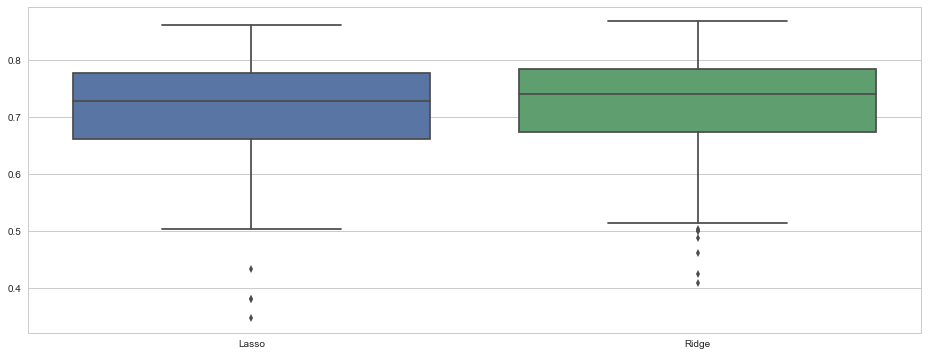

In [89]:
np.random.seed(10011001)
alpha = 0.2 # fixando o alpha para comparar os algoritmos
samples = 200
results = [np.zeros(samples) , np.zeros(samples)] # [0] = lasso , [1] == ridge
    
for i in range(samples):
    results[0][i],_ = lasso_regression(df,a,all_predictors,target,0.1) 
    results[1][i],_ = ridgeRegression(df,a,all_predictors)

result_df = pd.DataFrame({'Lasso':results[0],'Ridge':results[1]})
print(result_df.describe()) # verificando os valores numericos

sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))
sns.boxplot(data=result_df) # visualização

## Conclusão:
Os modelos Ridge e Lasso foram os melhores que encontramos e tiveram resultados parecidos, mas o Ridge teve um score R2 maior que o Lasso. Foi interessante também usa-los para variar as features e tentar rodar a regressão simples e ver se algo melhorava. Nos dois algoritmos a feature V9 foi considerada Ruim, no entanto o resultado da regressão simples ao retira-lo não foi tão satisfatório